#  Object Recognition using ResNet50
This project involves the development of a deep learning model for classifying images from the CIFAR-10 dataset, which consists of 60,000 32x32 color images across 10 different classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The primary objective is to create an efficient neural network capable of accurately predicting the class of an image based on its visual content.

## Project Overview
This project focuses on developing a deep learning model to classify images from the CIFAR-10 dataset, which contains 60,000 images across 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The model utilizes convolutional neural networks (CNNs) and incorporates transfer learning through the ResNet50 architecture to enhance accuracy.

**Key Objectives:**
- Develop an image classification model capable of accurately categorizing CIFAR-10 images.
- Implement data preprocessing techniques for optimal input quality.
- Create a user-friendly prediction system for classifying input images.
  
**Methodology:**

The project involves downloading and preprocessing the dataset, constructing a CNN model using ResNet50, and training the model on the training set while monitoring validation performance. After evaluation on a test dataset, the model's accuracy is reported.

**Results:**

The model's performance is visualized through accuracy and loss plots, showcasing its effectiveness in image classification. The resulting system allows users to input images and receive predictions, demonstrating practical applications in areas like object recognition and autonomous systems.

## Problem Statement
In the field of computer vision, the ability to accurately classify and recognize images is crucial for a variety of applications, including autonomous vehicles, security systems, and content moderation. The CIFAR-10 dataset, consisting of 60,000 32x32 color images categorized into 10 distinct classes, presents a challenge due to the similarities in visual characteristics among different classes. Traditional image classification methods struggle to achieve high accuracy on such datasets, particularly when the model is required to generalize well across unseen data.

The primary objective of this project is to develop a robust deep learning model capable of accurately classifying images from the CIFAR-10 dataset. This involves leveraging advanced techniques such as convolutional neural networks (CNNs) and transfer learning with established architectures like ResNet50. The model must effectively process and learn from the dataset to provide reliable predictions, overcoming challenges such as overfitting, data imbalance, and variability in image quality.

By addressing these challenges, this project aims to contribute to the advancement of automated image classification systems, enhancing their applicability in real-world scenarios.

## Dataset
The [CIFAR-10 dataset](https://www.kaggle.com/competitions/cifar-10/data) is a widely used benchmark in the field of machine learning and computer vision, particularly for image classification tasks. It was created by the Canadian Institute for Advanced Research and contains a total of 60,000 32x32 color images, evenly distributed across 10 distinct classes. Each class comprises 6,000 images, making it a well-balanced dataset for training and evaluation.

**Classes:**

The images in the CIFAR-10 dataset belong to the following categories:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

**Structure:**

The dataset is split into two main subsets:

- **Training Set:** Contains 50,000 images used for training the model.
- **Test Set:** Contains 10,000 images used for evaluating the model's performance.

**Challenges:**

The CIFAR-10 dataset presents several challenges for image classification, including:

- **Low Resolution:** The small image size (32x32 pixels) makes it difficult for models to capture fine details, requiring them to focus on high-level features.
- **Similarities Between Classes:** Some classes share visual characteristics, leading to potential confusion during classification, which tests the model's ability to generalize.

**Applications:**

Due to its simplicity and the challenges it presents, the CIFAR-10 dataset is commonly used for:

- Benchmarking new algorithms and models in image classification.
- Educational purposes in machine learning and computer vision courses.
- Research on improving the accuracy and efficiency of deep learning models.

In [66]:
# Install the Kaggle package to interact with Kaggle datasets and competitions
!pip install kaggle

In [67]:
# Create a directory for the Kaggle configuration and copy the Kaggle API token (kaggle.json) into it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [68]:
# Download the CIFAR-10 competition dataset from Kaggle
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
# List the files in the current directory to check the download
!ls

cifar10_model.h5  kaggle.json  sampleSubmission.csv  train     trainLabels.csv
cifar-10.zip	  sample_data  test.7z		     train.7z


In [70]:
# Extract the downloaded compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

# Open the ZIP file and extract its contents
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [71]:
# List the files again to confirm extraction
!ls

cifar10_model.h5  kaggle.json  sampleSubmission.csv  train     trainLabels.csv
cifar-10.zip	  sample_data  test.7z		     train.7z


In [72]:
# Install the py7zr package to handle 7z file extraction
!pip install py7zr

In [73]:
import py7zr

# Open and extract the 7z file containing training images
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [74]:
!ls

cifar10_model.h5  kaggle.json  sampleSubmission.csv  train     trainLabels.csv
cifar-10.zip	  sample_data  test.7z		     train.7z


**Importing dependencies**

In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [76]:
# List all filenames in the training directory
filenames =os.listdir('/content/train')

type(filenames)

list

In [77]:
len(filenames)

50000

In [78]:
print(filenames[0:5])
print(filenames[-5:])

['12197.png', '24527.png', '25703.png', '2955.png', '32656.png']
['43629.png', '14704.png', '42274.png', '5126.png', '13540.png']


**Labels Processing**

In [79]:
# Load the labels from the CSV file
labels_df = pd.read_csv('/content/trainLabels.csv')

labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [80]:
labels_df.shape

(50000, 2)

In [81]:
# Check the label corresponding to a specific ID
labels_df[labels_df['id'] == 33957]

,id,label
33956,33957,cat


In [82]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [83]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [84]:
# Create a dictionary to map label names to integers
labels_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

# Convert the labels to integers using the dictionary
labels  = [labels_dict[i] for i in labels_df['label']]

In [85]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


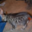

(32, 32, 3)


In [86]:
# Display a sample image using OpenCV
import cv2

img = cv2.imread('/content/train/33957.png')
from google.colab.patches import cv2_imshow
cv2_imshow(img)

print(img.shape)

In [87]:
# Check the label corresponding to the displayed image ID
labels_df[labels_df['id'] == 33957]

,id,label
33956,33957,cat


In [88]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [89]:
# Display the first few IDs from the labels DataFrame
id_list = list(labels_df['id'])

print(id_list[0:5])
print(id_list[-5::])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [90]:
# convert images to numpy arrays
train_data_folder = '/content/train/'

# Initialize an empty list to hold the image data
data = []

# Loop through each ID and read the corresponding image
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [91]:
type(data)

list

In [92]:
len(data)

50000

In [93]:
type(data[0])

numpy.ndarray

In [94]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
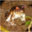

In [95]:
data[0]

In [96]:
# Convert images and labels to numpy arrays for model training

x = np.array(data)
Y = np.array(labels)

In [97]:
type(x)

numpy.ndarray

In [98]:
print(x.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [99]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state=42, test_size=0.2)

In [100]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [101]:
# Scale/normalize the data to [0, 1] range for better performance
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [102]:
x_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

**Building the neural network**

In [103]:
import tensorflow as tf
from tensorflow import keras

In [104]:
# Set the number of classes in the dataset
num_of_classes =10

#setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
                          ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
# Compile the neural network with optimizer and loss function
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['acc'])

In [106]:
# training the neural network
model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2394 - loss: 2.0849 - val_acc: 0.3117 - val_loss: 1.8995
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3230 - loss: 1.8678 - val_acc: 0.3330 - val_loss: 1.8353
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3406 - loss: 1.8280 - val_acc: 0.3417 - val_loss: 1.8275
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3507 - loss: 1.8032 - val_acc: 0.3537 - val_loss: 1.7889
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3583 - loss: 1.7764 - val_acc: 0.3377 - val_loss: 1.8104
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3593 - loss: 1.7733 - val_acc: 0.3593 - val_loss: 1.7746
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3688 - loss: 1.7622 - val_acc: 0.3492 - val_loss: 1.7985
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3718 - loss: 1.7426 - val_acc: 0.3650 - val_loss: 1.7608
Epoch 9/30
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [107]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [108]:
# Load the ResNet50 model without the top layer, using pre-trained weights
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [109]:
# Set the number of classes again for the new model
num_of_classes = 10

# Initialize a new Sequential model
model =models.Sequential()

# Add upsampling layers to increase the image size
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

# Add the ResNet50 convolutional base
model.add(convolutional_base)

# Flatten the output for the fully connected layers
model.add(layers.Flatten())
model.add(layers.BatchNormalization()) # Normalize the activations
model.add(layers.Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(layers.Dropout(0.5)) # Dropout layer for regularization
model.add(layers.BatchNormalization()) # Normalize again
model.add(layers.Dense(64, activation='relu'))  # Another dense layer
model.add(layers.Dropout(0.5)) # Dropout layer for regularization
model.add(layers.BatchNormalization()) # Normalize again
model.add(layers.Dense(num_of_classes, activation='softmax')) # Final output layer

In [110]:
# Compile the new model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [111]:
# Train the new model with the training data
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 435s 347ms/step - acc: 0.3266 - loss: 2.0387 - val_acc: 0.7670 - val_loss: 0.8549
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 424s 350ms/step - acc: 0.6812 - loss: 1.0521 - val_acc: 0.8813 - val_loss: 0.4974
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 447s 354ms/step - acc: 0.8125 - loss: 0.7267 - val_acc: 0.9150 - val_loss: 0.3418
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 362ms/step - acc: 0.8673 - loss: 0.5649 - val_acc: 0.9230 - val_loss: 0.3012
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 354ms/step - acc: 0.9069 - loss: 0.4397 - val_acc: 0.9365 - val_loss: 0.2573
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 406s 361ms/step - acc: 0.9352 - loss: 0.3464 - val_acc: 0.9342 - val_loss: 0.2521
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 354ms/step - acc: 0.9546 - loss: 0.2752 - val_acc: 0.9380 - val_loss: 0.2319
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 354ms/step - acc: 0.9664 - loss: 0.2278 - val_acc: 0.9320 - val_loss: 0.2535
Epoch 9/

In [112]:
# Evaluate the model on the test set and print the accuracy
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - acc: 0.9435 - loss: 0.2103
Test Accuracy = 0.941100001335144


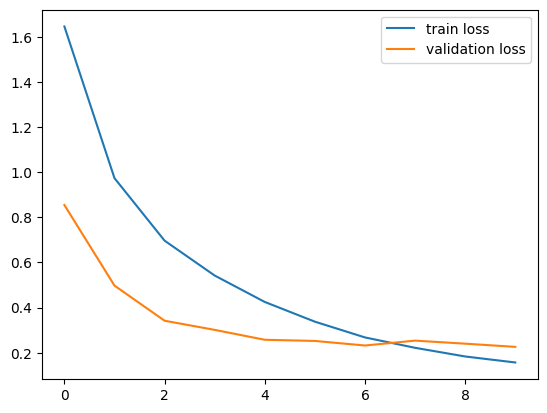

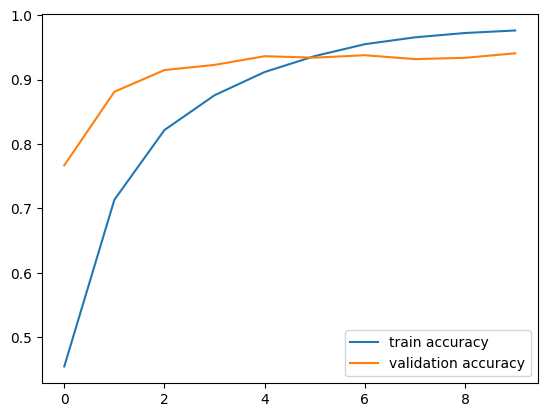

In [113]:
# Store the training history for plotting
h = history

# Plot the loss values over epochs for training and validation
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy values over epochs for training and validation
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [120]:
model.save('cifar10_model.h5')


In [122]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model again
model.save('cifar10_model.h5')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4109 - loss: 1.6520 - val_accuracy: 0.5599 - val_loss: 1.2587
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5902 - loss: 1.1682 - val_accuracy: 0.5810 - val_loss: 1.1941
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6434 - loss: 1.0284 - val_accuracy: 0.6130 - val_loss: 1.0954
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6739 - loss: 0.9289 - val_accuracy: 0.6395 - val_loss: 1.0380
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7054 - loss: 0.8489 - val_accuracy: 0.6484 - val_loss: 1.0290
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7255 - loss: 0.7722 - val_accuracy: 0.6521 - val_loss: 1.0266
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7538 - loss: 0.7013 - val_accuracy: 0.6450 - val_loss: 1.0348
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7755 - loss: 0.6394 

In [123]:
model = keras.models.load_model('cifar10_model.h5')
model.summary()  # Check if the model loads correctly now


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,916 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [124]:
import numpy as np
from tensorflow import keras
from PIL import Image
import cv2

# Load the trained model
model = keras.models.load_model('cifar10_model.h5')


# Define a function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)
    img = img.resize((32, 32))  # Resize to the expected input size
    img = np.array(img) / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define a function to predict the label of the image
def predict_image(image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions)  # Get the class with the highest probability
    return predicted_label

# Define a dictionary to map labels to class names
labels_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
               4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

# Function to make a prediction and display the result
def make_prediction(image_name):
    image_path = f'/content/train/{image_name}'  # Adjust the path as necessary
    predicted_label = predict_image(image_path)
    class_name = labels_dict[predicted_label]
    print(f'The predicted class for the image "{image_name}" is: {class_name}')

# Example usage:
make_prediction('33957.png')  # Replace with your desired image name


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
The predicted class for the image "33957.png" is: cat


AttributeError: Exception encountered when calling Flatten.call().

[1m'list' object has no attribute 'shape'[0m

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(32, 8, 8, 2048), dtype=float32, sparse=False, name=keras_tensor_9419>'],)
  • kwargs=<class 'inspect._empty'>